In [108]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import scipy.stats
import numpy as np
from math import sqrt
import seaborn as sns

In [2]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [3]:
cdatasub = pd.read_csv("london_flows.csv")

In [4]:
file_network = cdatasub

In [5]:
file_network = file_network.drop(file_network[file_network.distance==0].index, axis=0)
file_network = file_network.drop(file_network[file_network.jobs==0].index, axis=0)
file_network = file_network.drop(file_network[file_network.population==0].index, axis=0)

In [6]:
file_networkmat = file_network.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
file_networkmat

C:\Users\W\AppData\Local\Temp\ipykernel_34036\4197376465.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat = file_network.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\4197376465.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat = file_network.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\4197376465.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is cu

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [7]:
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    file_network[f"log_{x}"] = np.log(file_network[x])
    log_x_vars.append(f"log_{x}")

formula = 'flows ~ station_origin + log_jobs + log_distance -1'

# run a production constrained sim.
prodSim = smf.glm(formula=formula, data=file_network, family=sm.families.Poisson()).fit()

# let's have a look at it's summary.
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 16 Apr 2024   Deviance:                   1.8615e+06
Time:                        10:10:59   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [8]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take file_network ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(file_network.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
file_network = file_network.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(file_network.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
file_network = file_network.merge(D_j, on = "station_destination", how = "left" )

C:\Users\W\AppData\Local\Temp\ipykernel_34036\175435249.py:3: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  O_i = pd.DataFrame(file_network.groupby(["station_origin"])["flows"].agg(np.sum))
C:\Users\W\AppData\Local\Temp\ipykernel_34036\175435249.py:7: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  D_j = pd.DataFrame(file_network.groupby(["station_destination"])["flows"].agg(np.sum))


In [9]:
# we can do this by pulling out the parameter values.
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns={0: "alpha_i", "index": "coef"}, inplace=True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
coefs
# then once you have done this you can join them back into the dataframes
file_network = file_network.merge(coefs, left_on="station_origin", right_on="coef", how="left")
file_network.drop(columns=["coef"], inplace=True)

# check this has worked
file_network.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242


In [10]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

C:\Users\W\AppData\Local\Temp\ipykernel_34036\1887813951.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gamma = prodSim.params[-2]
C:\Users\W\AppData\Local\Temp\ipykernel_34036\1887813951.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = -prodSim.params[-1]


In [11]:
alpha_i

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Wood Street]         5.242024
station_origin[Woodford]            5.160643
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
Length: 398, dtype: float64

In [12]:
gamma

0.7686156200124401

In [13]:
beta

0.878119118372422

In [14]:
# to check everything works, recreate the original estimates
file_network["prodsimest1"] = np.exp(file_network["alpha_i"] + gamma*np.log(file_network["jobs"]) 
                                     - beta*np.log(file_network["distance"]))


file_network

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242,49.060970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,6.905590,121.206340
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,6.905590,259.262677
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,6.905590,31.963713
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,6.905590,98.359769


In [15]:
# round
file_network["prodsimest1"] = round(file_network["prodsimest1"],0)

file_networkmat1 = file_network.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
file_networkmat1

C:\Users\W\AppData\Local\Temp\ipykernel_34036\315793356.py:4: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat1 = file_network.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\315793356.py:4: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat1 = file_network.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\315793356.py:4: FutureWarning: The provided callable <function sum at 0x000001714A82

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [16]:
CalcRSqaured(file_network["flows"],file_network["prodsimest1"])

0.38827639501783223

In [17]:
CalcRMSE(file_network["flows"],file_network["prodsimest1"])

102.893

In [18]:
file_networkmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


## Scenario A

In [19]:
def new_sal(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"]/2
    else:
        val = row["jobs"]
    return val


file_network["jobs_scenario_A"] = file_network.apply(new_sal, axis=1)
file_network.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,jobs_scenario_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242,49.0,15428.0


In [20]:
# to check everything works, recreate the original estimates
file_network["prodsimest2"] = np.exp(file_network["alpha_i"]+gamma*np.log(file_network["jobs_scenario_A"]) - beta*np.log(file_network["distance"]))


# round
file_network["prodsimest2"] = round(file_network["prodsimest2"],0)

file_networkmatA = file_network.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
file_networkmatA

C:\Users\W\AppData\Local\Temp\ipykernel_34036\913118605.py:8: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatA = file_network.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\913118605.py:8: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatA = file_network.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\913118605.py:8: FutureWarning: The provided callable <function sum at 0x000001714A82

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


In [21]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = file_network["jobs"]**gamma
dist_beta = file_network["distance"]**-beta

#calcualte the first stage of the Ai values
file_network["Ai1"] = Dj2_gamma * dist_beta

#now do the sum over all js bit
A_i = pd.DataFrame(file_network.groupby(["station_origin"])["Ai1"].agg(np.sum))

#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]

A_i.rename(columns={"Ai1":"A_i"}, inplace=True)

#and write the A_i values back into the dataframe
file_network = file_network.merge(A_i, left_on="station_origin", right_index=True, how="left")

C:\Users\W\AppData\Local\Temp\ipykernel_34036\3270621878.py:9: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  A_i = pd.DataFrame(file_network.groupby(["station_origin"])["Ai1"].agg(np.sum))


In [22]:
#to check everything works, recreate the original estimates
file_network["prodsimest3"] = file_network["A_i"]*file_network["O_i"]*Dj2_gamma * dist_beta
#round
file_network["prodsimest3"] = round(file_network["prodsimest3"])
#check
file_network[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,55.0
1,1.0,1.0
2,3.0,3.0
3,66.0,66.0
4,49.0,49.0
...,...,...
61408,121.0,121.0
61409,259.0,259.0
61410,32.0,32.0
61411,98.0,98.0


In [23]:
#calculate some new Dj^gamma and d_ij^beta values
Dj3_gamma = file_network["jobs_scenario_A"]**gamma
#calcualte the first stage of the Ai values
file_network["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(file_network.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
file_network = file_network.merge(A_i, left_on="station_origin", right_index=True, how="left")

C:\Users\W\AppData\Local\Temp\ipykernel_34036\1211723060.py:6: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  A_i = pd.DataFrame(file_network.groupby(["station_origin"])["Ai1"].agg(np.sum))


In [24]:
file_network

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,jobs_scenario_A,prodsimest2,Ai1,A_i,prodsimest3,A_i2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242,55.0,78549.0,55.0,2.132479,0.043066,55.0,0.045134
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242,1.0,442.0,1.0,0.038226,0.043066,1.0,0.045134
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242,3.0,665.0,3.0,0.106822,0.043066,3.0,0.045134
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242,66.0,29386.0,39.0,1.512182,0.043066,66.0,0.045134
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242,49.0,15428.0,49.0,1.901840,0.043066,49.0,0.045134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,6.905590,121.0,3342.0,121.0,0.121469,0.126437,121.0,0.136719
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,6.905590,259.0,5487.0,259.0,0.259825,0.126437,259.0,0.136719
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,6.905590,32.0,400.0,32.0,0.032033,0.126437,32.0,0.136719
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,6.905590,98.0,893.0,98.0,0.098573,0.126437,98.0,0.136719


In [25]:
#to check everything works, recreate the original estimates
file_network["prodsimest4"] = file_network["A_i2"]*file_network["O_i"]*Dj3_gamma*dist_beta
#round
file_network["prodsimest4"] = round(file_network["prodsimest4"])

In [26]:
file_networkmat3 = file_network.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
file_networkmat3

C:\Users\W\AppData\Local\Temp\ipykernel_34036\1743431668.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat3 = file_network.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\1743431668.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmat3 = file_network.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\1743431668.py:1: FutureWarning: The provided callable <function sum at 0x000001714

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [102]:
# 计算增加的值
file_network['increase'] = file_network['prodsimest4'] - file_network['prodsimest1']

# 筛选出增加的行
increased = file_network[file_network['increase'] > 0]
# 筛选出减少的行
decreased = file_network[file_network['increase'] < 0]



In [115]:
# 变化百分比
mask = increased['prodsimest1'] != 0
increased.loc[mask, 'increase_percentage'] = increased['increase'] * 100 / increased.loc[mask, 'prodsimest1']

mask = decreased['prodsimest1'] != 0
decreased.loc[mask, 'decrease_percentage'] = decreased['increase'] * 100 / decreased.loc[mask, 'prodsimest1']


In [113]:
increased = increased.sort_values(by='increase', ascending=False)
# 查看排序后的 DataFrame
increased[['station_origin', 'station_destination', 'flows', 'prodsimest1', 'prodsimest4', 'increase', 'increase_percentage']].head(10).round(2)

,station_origin,station_destination,flows,prodsimest1,prodsimest4,increase,increase_percentage
49390,Stockwell,Aldgate East,56,68.0,69.0,1.0,1.47
15626,East India,Pudding Mill Lane,1,4.0,5.0,1.0,25.00
15623,East India,Pontoon Dock,7,12.0,13.0,1.0,8.33
15622,East India,Mudchute,1,4.0,5.0,1.0,25.00
3656,Barons Court,High Street Kensington,5,47.0,48.0,1.0,2.13
15619,East India,Lewisham,17,11.0,12.0,1.0,9.09
15617,East India,King George V,3,6.0,7.0,1.0,16.67
15616,East India,Island Gardens,5,7.0,8.0,1.0,14.29
15627,East India,Royal Albert,1,7.0,8.0,1.0,14.29
15614,East India,Greenwich,4,8.0,9.0,1.0,12.50


In [117]:
decreased = decreased.sort_values(by='increase', ascending=True)
# 查看排序后的 DataFrame
decreased[['station_origin', 'station_destination', 'flows', 'prodsimest1', 'prodsimest4', 'increase', 'decrease_percentage']].head(10).round(2)

,station_origin,station_destination,flows,prodsimest1,prodsimest4,increase,decrease_percentage
49894,Stratford,Canary Wharf,3875,2428.0,1450.0,-978.0,-40.28
8516,Canada Water,Canary Wharf,4030,1747.0,1053.0,-694.0,-39.73
9124,Canning Town,Canary Wharf,1258,1549.0,937.0,-612.0,-39.51
31665,Lewisham,Canary Wharf,1920,1717.0,1107.0,-610.0,-35.53
61381,Woolwich Arsenal,Canary Wharf,82,1437.0,912.0,-525.0,-36.53
36318,North Greenwich,Canary Wharf,1616,1320.0,815.0,-505.0,-38.26
32234,Limehouse,Canary Wharf,627,1453.0,962.0,-491.0,-33.79
55915,Waterloo,Canary Wharf,8085,1128.0,667.0,-461.0,-40.87
44750,Shadwell,Canary Wharf,596,794.0,490.0,-304.0,-38.29
40939,Poplar,Canary Wharf,55,1054.0,765.0,-289.0,-27.42


In [98]:
# Change

change = increased[['station_origin', 'station_destination', 'flows', 'prodsimest1', 'prodsimest4', 'increase', 'increase_percentage']].round(2)

change.describe().round(2)

,flows,prodsimest1,prodsimest4,increase,increase_percentage
count,41388.00,41388.00,41388.00,41388.00,26912.00
mean,8.85,24.66,24.77,15.92,375.59
std,37.00,83.11,83.12,60.15,880.11
min,0.00,0.00,1.00,1.00,0.34
25%,0.00,3.00,3.00,2.00,75.00
50%,1.00,7.00,7.00,5.00,166.67
75%,6.00,20.00,20.00,12.00,400.00
max,1862.00,4440.00,4480.00,4035.00,48800.00


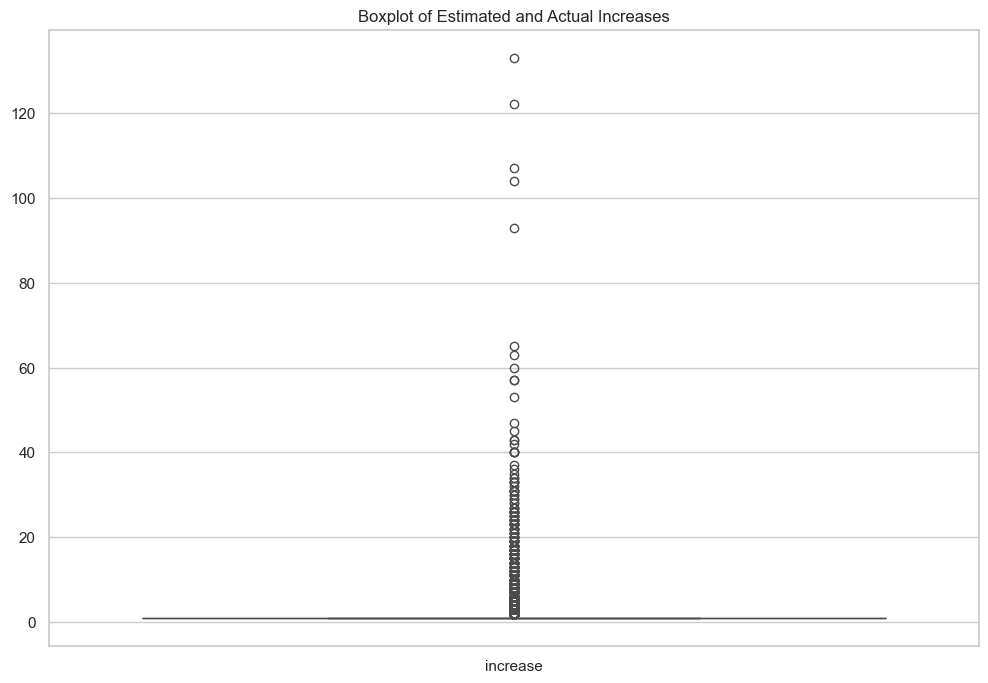

In [112]:
# 假设 increased 是已经存在的 DataFrame
# 只选择包含特定列的数据
data_to_plot = increased[['increase']]

# 设置绘图风格
sns.set(style="whitegrid")

# 准备画布
plt.figure(figsize=(12, 8))

# 使用 seaborn 的 boxplot 函数来绘制箱型图
sns.boxplot(data=data_to_plot)

# 添加图表标题
plt.title('Boxplot of Estimated and Actual Increases')

# 显示图表
plt.show()

## Scenario B

The original beta is 0.878119118372422

Beta 2, increase 50%.  

Beta 3, increase 100%.

In [28]:
beta2 = beta * 1.5
beta3 = beta * 2
beta2, beta3

(1.317178677558633, 1.756238236744844)

Function: 

file_network["prodsimest1"] = np.exp(file_network["alpha_i"] + gamma*np.log(file_network["jobs"]) 
                                     - beta*np.log(file_network["distance"]))

##### Beta2

In [29]:
#calculate new d_ij^beta values
dist_beta2 = file_network["distance"]**-beta2
#calcualte the first stage of the Ai values
file_network["Ai2"] = Dj2_gamma * dist_beta2
#now do the sum over all js bit
A_i2 = pd.DataFrame(file_network.groupby(["station_origin"])["Ai2"].agg(np.sum))
#now divide into 1
A_i2["Ai2"] = 1/A_i2["Ai2"]
A_i2.rename(columns={"Ai2":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
file_network = file_network.merge(A_i2, left_on="station_origin", right_index=True, how="left")

C:\Users\W\AppData\Local\Temp\ipykernel_34036\534244951.py:6: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  A_i2 = pd.DataFrame(file_network.groupby(["station_origin"])["Ai2"].agg(np.sum))


In [30]:
#to check everything works, recreate the original estimates
file_network["prodsimestB2"] = file_network["A_i3"]*file_network["O_i"]*Dj2_gamma*dist_beta2
#round
file_network["prodsimestB2"] = round(file_network["prodsimestB2"])

In [31]:
file_networkmatB2 = file_network.pivot_table(values ="prodsimestB2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
file_networkmatB2.fillna(0, inplace=True)
file_networkmatB2

C:\Users\W\AppData\Local\Temp\ipykernel_34036\2254252975.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatB2 = file_network.pivot_table(values ="prodsimestB2", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\2254252975.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatB2 = file_network.pivot_table(values ="prodsimestB2", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\2254252975.py:1: FutureWarning: The provided callable <function sum at 0x00000

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,597.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1226.0
Acton Town,0.0,0.0,0.0,14.0,14.0,0.0,12.0,0.0,0.0,16.0,...,13.0,3.0,4.0,15.0,0.0,1.0,0.0,1.0,0.0,3740.0
Aldgate,0.0,0.0,1.0,0.0,58.0,0.0,0.0,0.0,0.0,18.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2872.0
Aldgate East,0.0,0.0,1.0,70.0,0.0,0.0,0.0,0.0,0.0,20.0,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,5.0,35.0,40.0,0.0,0.0,0.0,0.0,31.0,...,11.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4862.0
Woodgrange Park,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,527.0
Woodside Park,0.0,0.0,4.0,19.0,19.0,0.0,1.0,0.0,0.0,25.0,...,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3092.0


##### Beta3

In [41]:
#calculate new d_ij^beta values
dist_beta3 = file_network["distance"]**-beta3
#calcualte the first stage of the Ai values
file_network["Ai3"] = Dj2_gamma * dist_beta3
#now do the sum over all js bit
A_i3 = pd.DataFrame(file_network.groupby(["station_origin"])["Ai3"].agg(np.sum))
#now divide into 1
A_i3["Ai3"] = 1/A_i3["Ai3"]
A_i3.rename(columns={"Ai3":"A_i4"}, inplace=True)
#and write the A_i values back into the dataframe
file_network = file_network.merge(A_i3, left_on="station_origin", right_index=True, how="left")

C:\Users\W\AppData\Local\Temp\ipykernel_34036\3438062620.py:6: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  A_i3 = pd.DataFrame(file_network.groupby(["station_origin"])["Ai3"].agg(np.sum))


In [44]:
#to check everything works, recreate the original estimates
file_network["prodsimestB3"] = file_network["A_i4"]*file_network["O_i"]*Dj2_gamma*dist_beta3
#round
file_network["prodsimestB3"] = round(file_network["prodsimestB3"])

In [46]:
file_networkmatB3 = file_network.pivot_table(values ="prodsimestB3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
file_networkmatB3.fillna(0, inplace=True)
file_networkmatB3

C:\Users\W\AppData\Local\Temp\ipykernel_34036\2422928909.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatB3 = file_network.pivot_table(values ="prodsimestB3", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\2422928909.py:1: FutureWarning: The provided callable <function sum at 0x000001714A825620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  file_networkmatB3 = file_network.pivot_table(values ="prodsimestB3", index="station_origin", columns = "station_destination",
C:\Users\W\AppData\Local\Temp\ipykernel_34036\2422928909.py:1: FutureWarning: The provided callable <function sum at 0x00000

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,598.0
Acton Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225.0
Acton Town,0.0,0.0,0.0,10.0,10.0,0.0,14.0,0.0,0.0,12.0,...,10.0,2.0,2.0,16.0,0.0,1.0,0.0,1.0,0.0,3749.0
Aldgate,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2875.0
Aldgate East,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,15.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0.0,0.0,4.0,33.0,40.0,0.0,0.0,0.0,0.0,27.0,...,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4866.0
Woodgrange Park,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0
Woodside Park,0.0,0.0,3.0,17.0,17.0,0.0,1.0,0.0,0.0,24.0,...,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3097.0


## Change

In [139]:
# 计算增加的值
file_network['changeB2'] = file_network['prodsimestB2'] - file_network['prodsimest1']
file_network['changeB3'] = file_network['prodsimestB3'] - file_network['prodsimest1']

# 筛选出增加的行
increaseB2 = file_network[file_network['changeB2'] > 0]
# 筛选出减少的行
decreasedB2 = file_network[file_network['changeB2'] < 0]
stable = file_network[file_network['changeB2'] == 0]

# 筛选出增加的行
increaseB3 = file_network[file_network['changeB3'] > 0]
# 筛选出减少的行
decreasedB3 = file_network[file_network['changeB3'] < 0]



In [140]:
stable


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Ai2,A_i3,prodsimestB2,Ai3,A_i4,prodsimestB3,changeB2,changeB3,changeB2_percentage,changeB3_percentage
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,599,...,0.002528,1.116898,2.0,0.000067,25.462486,1.0,0.0,-1.0,0.0,0.0
33,Acton Central,Brondesbury,76,1224,712,6439.433521,7.109879,6.568078,8.770196,1224,...,0.001498,5.993676,11.0,0.000032,244.809907,10.0,0.0,-1.0,0.0,0.0
40,Acton Central,Carpenders Park,0,1224,340,18314.695255,7.109879,5.828946,9.815459,1224,...,0.000214,5.993676,2.0,0.000003,244.809907,1.0,0.0,-1.0,0.0,0.0
56,Acton Central,Hatch End,0,1224,93,15871.352958,7.109879,4.532599,9.672271,1224,...,0.000096,5.993676,1.0,0.000001,244.809907,0.0,0.0,-1.0,0.0,0.0
67,Acton Central,Kilburn High Road,0,1224,266,6866.843319,7.109879,5.583496,8.834460,1224,...,0.000646,5.993676,5.0,0.000013,244.809907,4.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61345,Woodside Park,Temple,5,3093,6780,16208.935459,8.036897,8.821732,9.693318,3093,...,0.002510,2.435088,19.0,0.000036,155.475683,17.0,0.0,-2.0,0.0,0.0
61353,Woodside Park,Turnham Green,0,3093,1515,23888.130760,8.036897,7.323171,10.081137,3093,...,0.000476,2.435088,4.0,0.000006,155.475683,3.0,0.0,-1.0,0.0,0.0
61374,Woolwich Arsenal,Abbey Road,20,7892,345,9235.296782,8.973605,5.843544,9.130788,7892,...,0.000534,6.961012,29.0,0.000010,369.816894,28.0,0.0,-1.0,0.0,0.0
61397,Woolwich Arsenal,Poplar,235,7892,1301,9275.857877,8.973605,7.170888,9.135170,7892,...,0.001472,6.961012,81.0,0.000027,369.816894,78.0,0.0,-3.0,0.0,0.0


In [132]:
# 变化百分比
mask = file_network['prodsimest1'] != 0
file_network.loc[mask, 'changeB2_percentage'] = file_network['changeB2'] * 100 / file_network.loc[mask, 'prodsimest1']

mask = file_network['prodsimest1'] != 0
file_network.loc[mask, 'changeB3_percentage'] = file_network['changeB2'] * 100 / file_network.loc[mask, 'prodsimest1']


In [141]:
change = file_network.sort_values(by='changeB2', ascending=False)
# 查看排序后的 DataFrame
change[['station_origin', 'station_destination', 'prodsimest1', 'prodsimestB2', 'changeB2', 'changeB2_percentage']]

,station_origin,station_destination,prodsimest1,prodsimestB2,changeB2,changeB2_percentage
32441,Liverpool Street,Moorgate,3065.0,5879.0,2814.0,91.810767
32584,London Bridge,Bank and Monument,4440.0,6978.0,2538.0,57.162162
56086,Waterloo,Southwark,2496.0,4584.0,2088.0,83.653846
8898,Canary Wharf,Heron Quays,1010.0,2860.0,1850.0,183.168317
32282,Liverpool Street,Bank and Monument,4187.0,6005.0,1818.0,43.420110
...,...,...,...,...,...,...
43478,Romford,Liverpool Street,1281.0,945.0,-336.0,-26.229508
19661,Gidea Park,Liverpool Street,880.0,540.0,-340.0,-38.636364
56095,Waterloo,Stratford,831.0,460.0,-371.0,-44.645006
27815,Ilford,Liverpool Street,1447.0,1057.0,-390.0,-26.952315


In [130]:
# Change

changeB2 = change[['station_origin', 'station_destination', 'prodsimest1', 'prodsimestB2', 'changeB2', 'changeB2_percentage']].round(2)

changeB2.describe().round(2)

,prodsimest1,prodsimestB2,changeB2,changeB2_percentage
count,61413.00,61413.00,61413.00,57797.00
mean,25.11,25.10,-0.00,-18.13
std,85.43,106.53,36.04,35.48
min,0.00,0.00,-415.00,-100.00
25%,2.00,2.00,-2.00,-33.33
50%,7.00,5.00,-1.00,-16.67
75%,20.00,17.00,0.00,0.00
max,4440.00,6978.00,2814.00,321.74


#### B2

In [142]:
changeB3 = file_network.sort_values(by='changeB3', ascending=False)
# 查看排序后的 DataFrame
changeB3[['station_origin', 'station_destination', 'prodsimest1', 'prodsimestB3', 'changeB3', 'changeB3_percentage']]

,station_origin,station_destination,prodsimest1,prodsimestB3,changeB3,changeB3_percentage
32441,Liverpool Street,Moorgate,3065.0,9394.0,6329.0,91.810767
32584,London Bridge,Bank and Monument,4440.0,9700.0,5260.0,57.162162
50146,Stratford,Stratford High Street,700.0,5884.0,5184.0,210.857143
56086,Waterloo,Southwark,2496.0,7493.0,4997.0,83.653846
8898,Canary Wharf,Heron Quays,1010.0,5807.0,4797.0,183.168317
...,...,...,...,...,...,...
43478,Romford,Liverpool Street,1281.0,623.0,-658.0,-26.229508
19667,Gidea Park,Stratford,1128.0,469.0,-659.0,-28.102837
56015,Waterloo,Liverpool Street,2320.0,1649.0,-671.0,-10.646552
27815,Ilford,Liverpool Street,1447.0,727.0,-720.0,-26.952315


In [143]:
# Change

changeB3 = change[['station_origin', 'station_destination', 'prodsimest1', 'prodsimestB3', 'changeB3', 'changeB3_percentage']].round(2)

changeB3.describe().round(2)

,prodsimest1,prodsimestB3,changeB3,changeB3_percentage
count,61413.00,61413.00,61413.00,57797.00
mean,25.11,25.09,-0.01,-18.13
std,85.43,139.06,82.74,35.48
min,0.00,0.00,-726.00,-100.00
25%,2.00,1.00,-5.00,-33.33
50%,7.00,4.00,-2.00,-16.67
75%,20.00,14.00,-1.00,0.00
max,4440.00,9700.00,6329.00,321.74


In [147]:
decreasedB3

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,Ai2,A_i3,prodsimestB2,Ai3,A_i4,prodsimestB3,changeB2,changeB3,changeB2_percentage,changeB3_percentage
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,0.040934,1.116898,27.0,0.000786,25.462486,12.0,-28.0,-43.0,-50.909091,-50.909091
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,0.000719,1.116898,0.0,0.000014,25.462486,0.0,-1.0,-1.0,-100.000000,-100.000000
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,0.002872,1.116898,2.0,0.000077,25.462486,1.0,-1.0,-2.0,-33.333333,-33.333333
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,0.060763,1.116898,41.0,0.001433,25.462486,22.0,-25.0,-44.0,-37.878788,-37.878788
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,0.064441,1.116898,43.0,0.002183,25.462486,33.0,-6.0,-16.0,-12.244898,-12.244898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61406,Woolwich Arsenal,Stratford High Street,255,7892,788,9890.508084,8.973605,6.669498,9.199331,7892,...,0.000920,6.961012,51.0,0.000016,369.816894,47.0,-1.0,-5.0,-1.923077,-1.923077
61407,Woolwich Arsenal,Stratford International,314,7892,1546,11696.031993,8.973605,7.343426,9.367005,7892,...,0.001239,6.961012,68.0,0.000020,369.816894,59.0,-8.0,-17.0,-10.526316,-10.526316
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,0.001872,6.961012,103.0,0.000029,369.816894,84.0,-18.0,-37.0,-14.876033,-14.876033
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,0.000573,6.961012,31.0,0.000010,369.816894,30.0,-1.0,-2.0,-3.125000,-3.125000


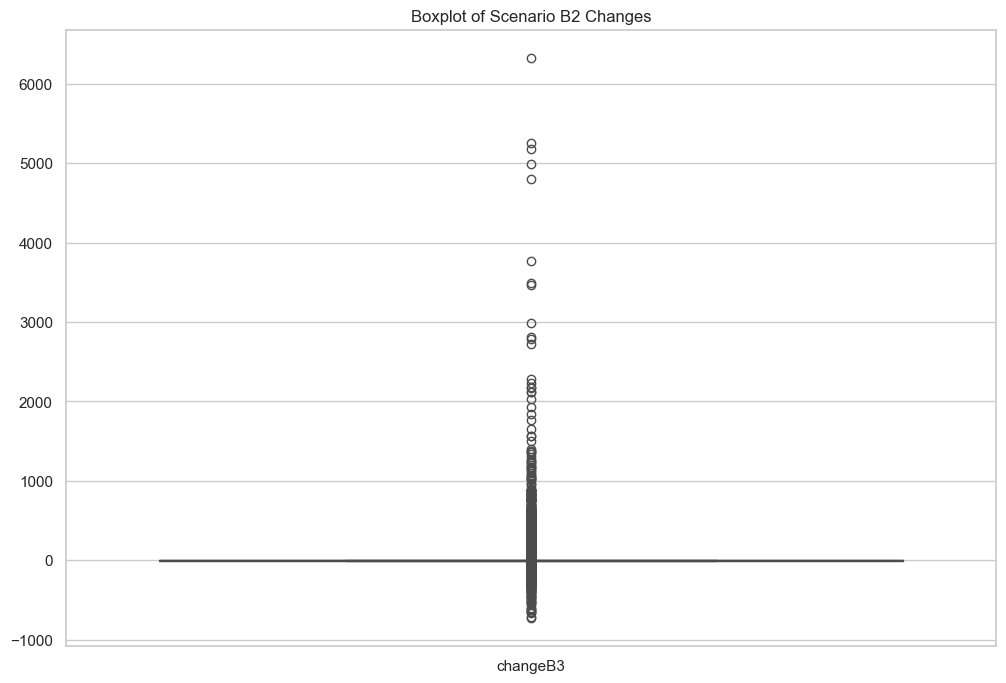

In [155]:
# 假设 increased 是已经存在的 DataFrame
# 只选择包含特定列的数据
data_to_plot = changeB3[['changeB3']]

# 设置绘图风格
sns.set(style="whitegrid")

# 准备画布
plt.figure(figsize=(12, 8))

# 使用 seaborn 的 boxplot 函数来绘制箱型图
sns.boxplot(data=data_to_plot)

# 添加图表标题
plt.title('Boxplot of Scenario B2 Changes')

# 显示图表
plt.show()

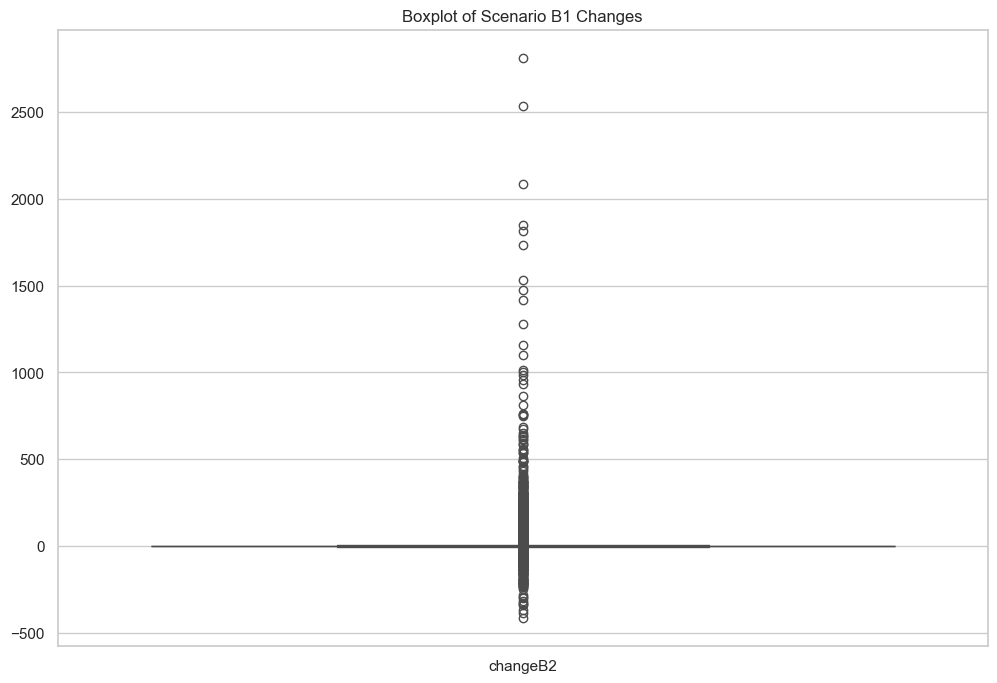

In [154]:
# 假设 increased 是已经存在的 DataFrame
# 只选择包含特定列的数据
data_to_plot = changeB2[['changeB2']]

# 设置绘图风格
sns.set(style="whitegrid")

# 准备画布
plt.figure(figsize=(12, 8))

# 使用 seaborn 的 boxplot 函数来绘制箱型图
sns.boxplot(data=data_to_plot)

# 添加图表标题
plt.title('Boxplot of Scenario B1 Changes')

# 显示图表
plt.show()